# Testing the model
We chose to test with 3000 iterations

In [1]:
from classes import *


# setup
steps = 100
yF2 = np.linspace(-2, 2, steps)
yFcos = np.linspace(-np.pi/3, np.pi/3, steps)
yF22 = np.array([np.linspace(-2, 2, steps), np.linspace(-2, 2, steps)])
yFsqrt = np.array([np.linspace(1, 2, steps), np.linspace(2, 3, steps)])

cF2 = F2(yF2)
cFcos = Fcos(yFcos)
cF22 = F22(yF22[0], yF22[1])
cFsqrt = Fsqrt(yFsqrt[0], yFsqrt[1])
# for 1 dim we need one more dim
yF2mod = np.array([yF2, np.zeros_like(yF2)])
yFcosmod = np.array([yFcos, np.zeros_like(yFcos)])
# Scale C values
cF2scaled = scale(cF2)
cFcosscaled = scale(cFcos)
cF22scaled = scale(cF22)
cFsqrtscaled = scale(cFsqrt)

In [2]:
# setup models. fixing start weights
modF2 = Model(yF2mod, cF2scaled, 10)
modFcos = Model(yFcosmod, cFcosscaled, 10)
modF22 = Model(yF22, cF22scaled, 10)
modFsqrt = Model(yFsqrt, cFsqrtscaled, 10)
# assign optimizers
pvgdF2 = PVGD(modF2.copy())
pvgdFcos = PVGD(modFcos.copy())
pvgdF22 = PVGD(modF22.copy())
pvgdFsqrt = PVGD(modFsqrt.copy())

adamF2 = Adam(modF2.copy())
adamFcos = Adam(modFcos.copy())
adamF22 = Adam(modF22.copy())
adamFsqrt = Adam(modFsqrt.copy())

In [ ]:
# Run
tol = 1e-5
maxiter = 3*1e3
h = 0.1
τ = 0.01
# run plain vanilla opimizers
pvgdF2.run(h, τ, tol, maxiter)
pvgdFcos.run(h, τ, tol, maxiter)
pvgdF22.run(h, τ, tol, maxiter)
pvgdFsqrt.run(h, τ, tol, maxiter)
# run Adam optimizers
adamF2.run(h, tol, maxiter)
adamFcos.run(h, tol, maxiter)
adamF22.run(h, tol, maxiter)
adamFsqrt.run(h, tol, maxiter)

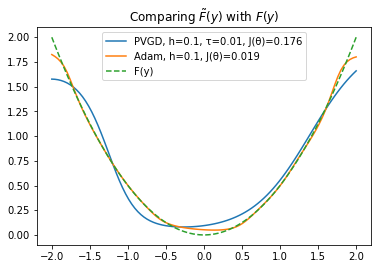

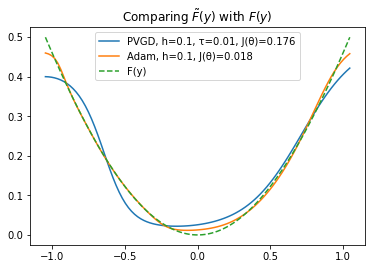

In [6]:
# plot models approximation against exact
plotApprox(cF2, pvgdF2, adamF2, x=yF2)
plotApprox(cFcos, pvgdFcos, adamFcos, x=yFcos)

Ignore the x-axis since input data is two dimensonal, thus the plot show the projection.

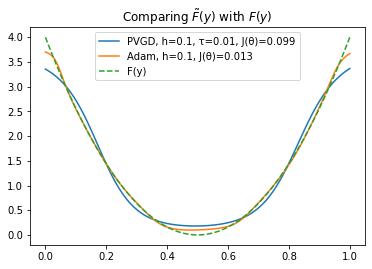

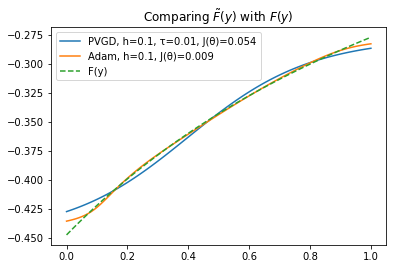

In [7]:
plotApprox(cF22, pvgdF22, adamF22)
plotApprox(cFsqrt, pvgdFsqrt, adamFsqrt)